<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_dl/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 載入資料
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# 看一下載入資料的數量跟尺寸 .shape 看每一個維度的數量
print('x_train' ,x_train.shape)
print('y_train' ,y_train.shape)
print('x_test' ,x_test.shape)
print('y_test' ,y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


In [ ]:
# 分類的類型
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

dog


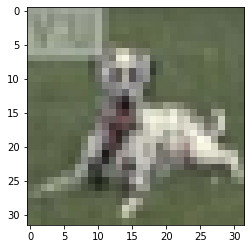

In [ ]:
# mnist y_train的shape是 : (60000, ) 代表裡面的資料是長這樣 => [5, 2, 1, 0]
# cifar的y_train shape 是（50000，1）代表裡面的資料是長這樣 => [[5], [2], [1], [0], ......]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [ ]:
# Conv3D 從4維變成3維，只有長x寬x高 配合3D圖片
# Conv2D 從3維變成2維，有長x寬，配合圖片
# Conv1D 從2維變成1維，只有長
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 參數數量：3 * 3 * 3深度 (一個kernal_size) * 64 + 64 = 1792 個
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 參數數量：3 * 3 * 64深度 (一個kernal_size) * 128 + 128 = 73856 個
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
# 將模型最後進行compile，透過稀疏矩陣，減少消耗的ram
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
#圖片處理
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
# 將資料丟進去模型進行訓練
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 35s - loss: 1.7479 - accuracy: 0.3494 - val_loss: 1.5111 - val_accuracy: 0.4286
Epoch 2/100
225/225 - 5s - loss: 1.3406 - accuracy: 0.5114 - val_loss: 1.1972 - val_accuracy: 0.5688
Epoch 3/100
225/225 - 5s - loss: 1.1540 - accuracy: 0.5862 - val_loss: 1.0574 - val_accuracy: 0.6212
Epoch 4/100
225/225 - 5s - loss: 1.0119 - accuracy: 0.6423 - val_loss: 0.9951 - val_accuracy: 0.6520
Epoch 5/100
225/225 - 5s - loss: 0.9104 - accuracy: 0.6792 - val_loss: 0.9632 - val_accuracy: 0.6648
Epoch 6/100
225/225 - 5s - loss: 0.8246 - accuracy: 0.7100 - val_loss: 0.8138 - val_accuracy: 0.7132
Epoch 7/100
225/225 - 5s - loss: 0.7537 - accuracy: 0.7368 - val_loss: 0.7682 - val_accuracy: 0.7326
Epoch 8/100
225/225 - 5s - loss: 0.6992 - accuracy: 0.7556 - val_loss: 0.7274 - val_accuracy: 0.7518
Epoch 9/100
225/225 - 5s - loss: 0.6303 - accuracy: 0.7802 - val_loss: 0.7547 - val_accuracy: 0.7382
Epoch 10/100
225/225 - 5s - loss: 0.5844 - accuracy: 0.7951 - val_loss: 0.6915 - val_accur

In [ ]:
# 模型訓練好後，將測試資料丟進去模型進行驗證
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7169 - accuracy: 0.7738


[0.7169325351715088, 0.7738000154495239]

In [ ]:
print(y_test.shape)
# print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba => predict
# predict => predice_classes
# 只要在tensorflow：就帶ont-hot encoding過後的值
# 不在：帶原本的y_test
model.predict(x_test_norm) # 預測的機率
pre = model.predict_classes(x_test_norm) # 選出機率最高的
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),763,29,37,17,11,4,10,12,81,36
automobile(正確),6,903,6,8,0,0,5,2,13,57
bird(正確),43,3,668,92,54,45,52,22,8,13
cat(正確),8,7,35,718,33,100,36,30,11,22
deer(正確),10,5,47,93,719,26,23,65,9,3
dog(正確),8,5,23,230,30,632,12,46,9,5
frog(正確),1,9,46,86,35,16,787,9,5,6
horse(正確),5,4,25,62,45,37,2,807,1,12
ship(正確),26,33,14,13,3,5,2,1,880,23
truck(正確),16,73,9,5,1,5,5,11,14,861


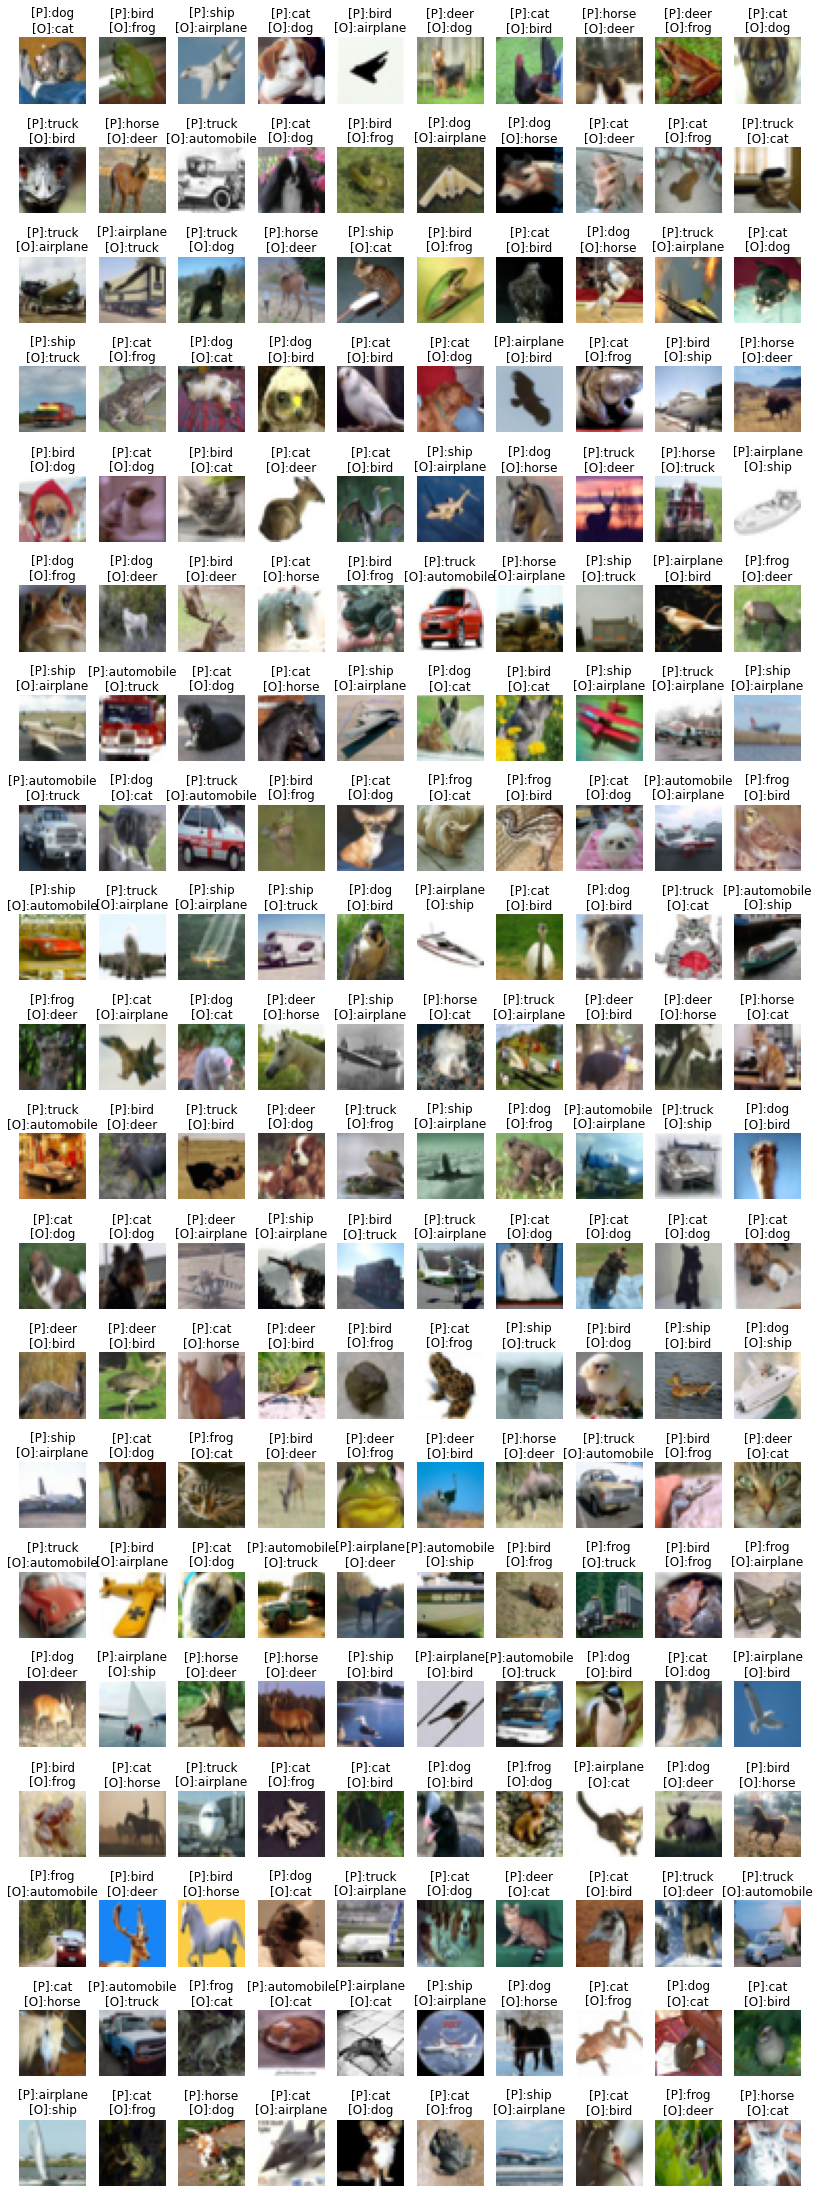

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0] # 預測錯誤的index們
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx] # 預測錯誤的，是預測成什麼
false_label = y_test_r[idx] # 預測錯誤的正確值應該是什麼
false_img = x_test[idx] # 被預測錯誤的圖片們

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])


輸入網址:https://zerojudge.tw/ShowImage?id=1571


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.004
automobile 的機率: 0.0
bird 的機率: 0.561
cat 的機率: 0.005
deer 的機率: 0.065
dog 的機率: 0.003
frog 的機率: 0.36
horse 的機率: 0.0
ship 的機率: 0.002
truck 的機率: 0.0


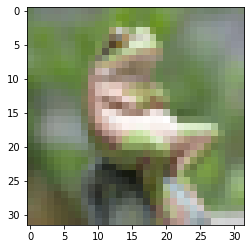

In [ ]:
import requests
from PIL import Image
url = input("輸入網址:")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(names, pre):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)